<a href="https://colab.research.google.com/github/sowmith8899/data690_skola2/blob/main/assignment_05/assignment05_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 05
### how to use Juptyer Notebooks:

#What is Jupyter Notebook?

The Jupyter Notebook is an open source web application that you can use to create and share documents that contain live code, equations, visualizations, and text. Jupyter Notebook is maintained by the people at Project Jupyter.

#Part 1: Everything in a cell

Jupyter notebooks are organized as a set of "cells". Each cell can contain different types of content (markdown text, Python code, R code, etc.) The current  cell containing text is a markdown cell, cells with code are code cells, as displayed below.

In [43]:
7 * 8

56

**Command Mode**

- shift + enter run cell, select below
-ctrl + enter run cell
-option + enter run cell, insert -below
-A insert cell above
-B insert cell below
-C copy cell
-V paste cell
-D , D delete selected cell
-shift + M merge selected cells, or current cell with cell below if only one cell selected
-I , I interrupt kernel
-0 , 0 restart kernel (with dialog)
-Y change cell to code mode
-M change cell to markdown mode (good for documentation)

#Part 2: Working with code

In [44]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500,6), 0)

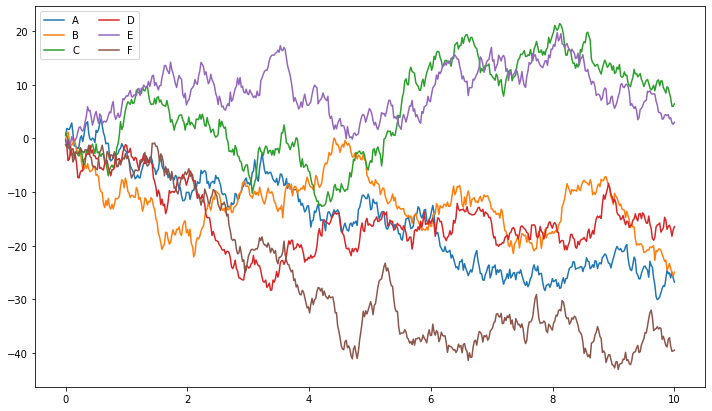

In [46]:
plt.figure(figsize=(12, 7))
plt.plot(x,y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

#Part 3: Interacting with data

In [47]:
import requests
import pandas as pd

In [48]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

In [49]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2022-09-28 21:26:38.445464')

In [50]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)


In [51]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)


#Bitcoin:

In [52]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-28 22:00:00,19582,19770,19528,19618,62.606168,1.228003e+06
2022-09-28 23:00:00,19607,19660,19421,19485,40.127620,7.838428e+05
2022-09-29 00:00:00,19483,19555,19391,19413,34.014300,6.616612e+05
2022-09-29 01:00:00,19413,19520,19375,19443,29.544523,5.740993e+05
2022-09-29 02:00:00,19433,19598,19431,19495,22.350044,4.367607e+05


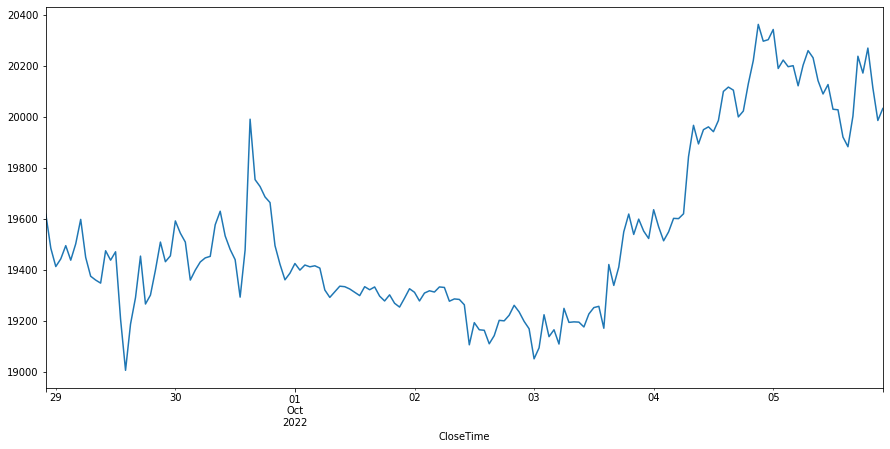

In [53]:
btc['ClosePrice'].plot(figsize=(15,7))

#Ether:

In [54]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-28 22:00:00,1351.5,1355.0,1342.0,1345.5,416.301596,561571.815918
2022-09-28 23:00:00,1345.3,1346.8,1333.7,1338.0,485.885129,651018.526472
2022-09-29 00:00:00,1338.0,1344.0,1335.7,1337.2,178.445375,238979.764914
2022-09-29 01:00:00,1337.3,1344.1,1328.4,1334.3,524.731152,702163.918459
2022-09-29 02:00:00,1333.6,1352.1,1333.0,1344.3,266.367705,358017.496468


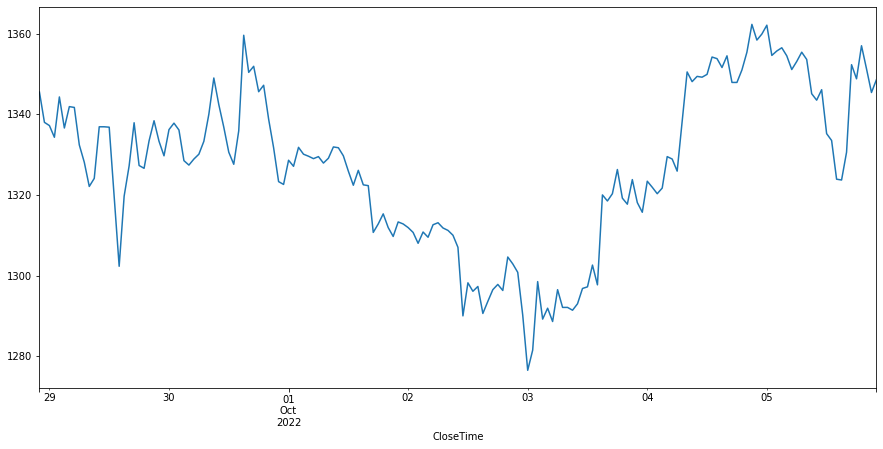

In [55]:
eth['ClosePrice'].plot(figsize=(15, 7))


In [56]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2022-09-28 22:00:00,1351.5,1355.0,1342.0,1345.5,416.301596,561571.815918
2022-09-28 23:00:00,1345.3,1346.8,1333.7,1338.0,485.885129,651018.526472
2022-09-29 00:00:00,1338.0,1344.0,1335.7,1337.2,178.445375,238979.764914
2022-09-29 01:00:00,1337.3,1344.1,1328.4,1334.3,524.731152,702163.918459
2022-09-29 02:00:00,1333.6,1352.1,1333.0,1344.3,266.367705,358017.496468


#Bonus: Dynamic plots with Bokeh

In [57]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

In [58]:
output_notebook()

In [59]:
p1 = figure(x_axis_type="datetime", title="Crypto Prices", width=800)
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'

p1.line(btc.index, btc['ClosePrice'], color='#f2a900', legend='Bitcoin')
#p1.line(eth.index, eth['ClosePrice'], color='#A6CEE3', legend='Ether')

p1.legend.location = "top_left"

show(p1)

#Part 4: Exporting to Excel

In [60]:
writer = pd.ExcelWriter('cryptos.xlsx')

In [61]:
btc.to_excel(writer, sheet_name='Bitcoin')


In [62]:
eth.to_excel(writer, sheet_name='Ether')

In [63]:
writer.save()